In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 100) # Setting pandas dataframe display width to N
import matplotlib.pyplot as plt # plotting library
from src.utils import import_data, categorial_feature_overview
import ppscore as pps # importing ppscore
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
file = "usersessions/train.json"
df = import_data(file)


Memory usage of dataframe is 14.19 MB
Memory usage after optimization is: 12.02 MB
Decreased by 15.3%


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   browser       60000 non-null  object        
 1   os            60000 non-null  object        
 2   locale        60000 non-null  object        
 3   gender        60000 non-null  object        
 4   time          60000 non-null  object        
 5   country       60000 non-null  object        
 6   city          60000 non-null  object        
 7   date_hour     60000 non-null  datetime64[ns]
 8   dayofweek     60000 non-null  object        
 9   day           60000 non-null  object        
 10  month         60000 non-null  object        
 11  year          60000 non-null  object        
 12  hour          60000 non-null  float16       
 13  hour_fixed    60000 non-null  float16       
 14  sites_num     60000 non-null  int8          
 15  session_len   60000 non-null  float1

In [4]:
(df.is_joe == 1).sum() / len(df) * 100


0.49

<AxesSubplot:>

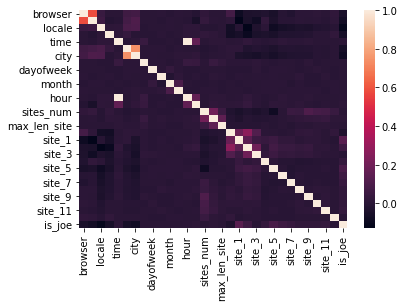

In [5]:
sns.heatmap(
    df.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson", min_periods=1)
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 

<AxesSubplot:xlabel='x', ylabel='y'>

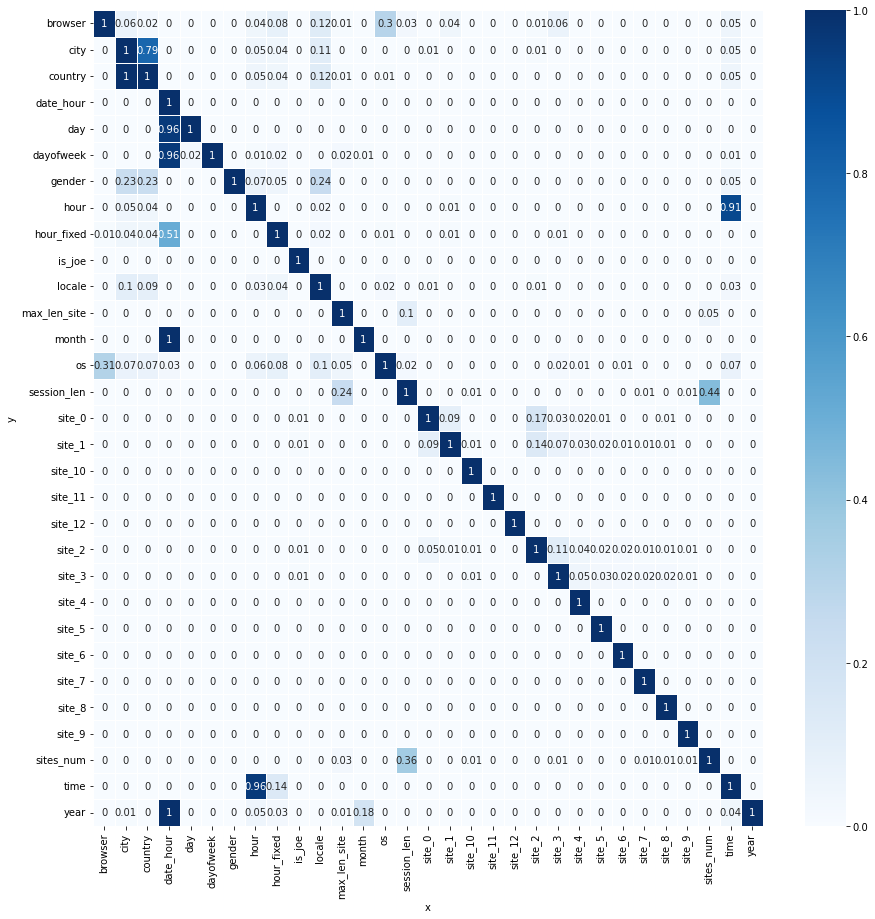

In [6]:
matrix_df = pps.matrix(df)[["x", "y", "ppscore"]].pivot(
    columns="x", index="y", values="ppscore"
)
matrix_df = matrix_df.apply(
    lambda x: round(x, 2)
)  # Rounding matrix_df's values to 0,XX
_, ax = plt.subplots(figsize=(15, 15))  # Sample figsize in inches


sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)


PPS matrix presents non-linear relationships between variables.

- High value for relationship between location and both, city and country.
- Relatively high value between os and browser.
- High value between sites_num and session_len


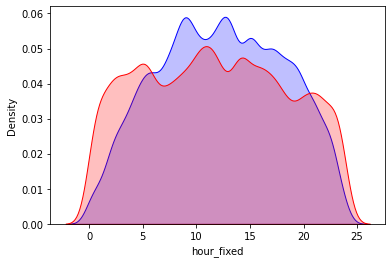

In [7]:
sns.kdeplot(df["hour_fixed"], shade=1, color="blue")
sns.kdeplot(df["hour"], shade=1, color="red")
plt.show()


fixing timezones drastically changed distribution of hours.


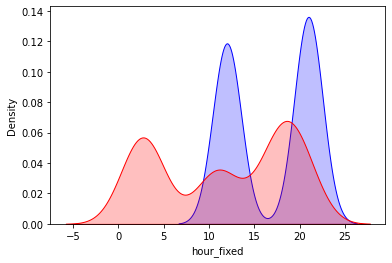

In [8]:
sns.kdeplot(x=df[df["is_joe"] == 1]["hour_fixed"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 1]["hour"], shade=1, color="red")
plt.show()


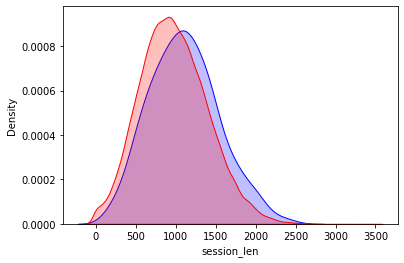

In [9]:
sns.kdeplot(x=df[df["is_joe"] == 1]["session_len"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 0]["session_len"], shade=1, color="red")
plt.show()


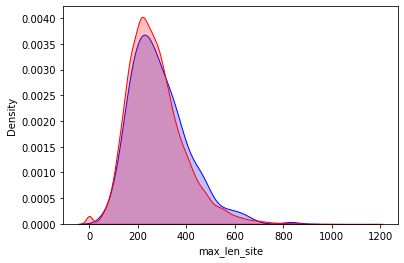

In [10]:
sns.kdeplot(x=df[df["is_joe"] == 1]["max_len_site"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 0]["max_len_site"], shade=1, color="red")
plt.show()


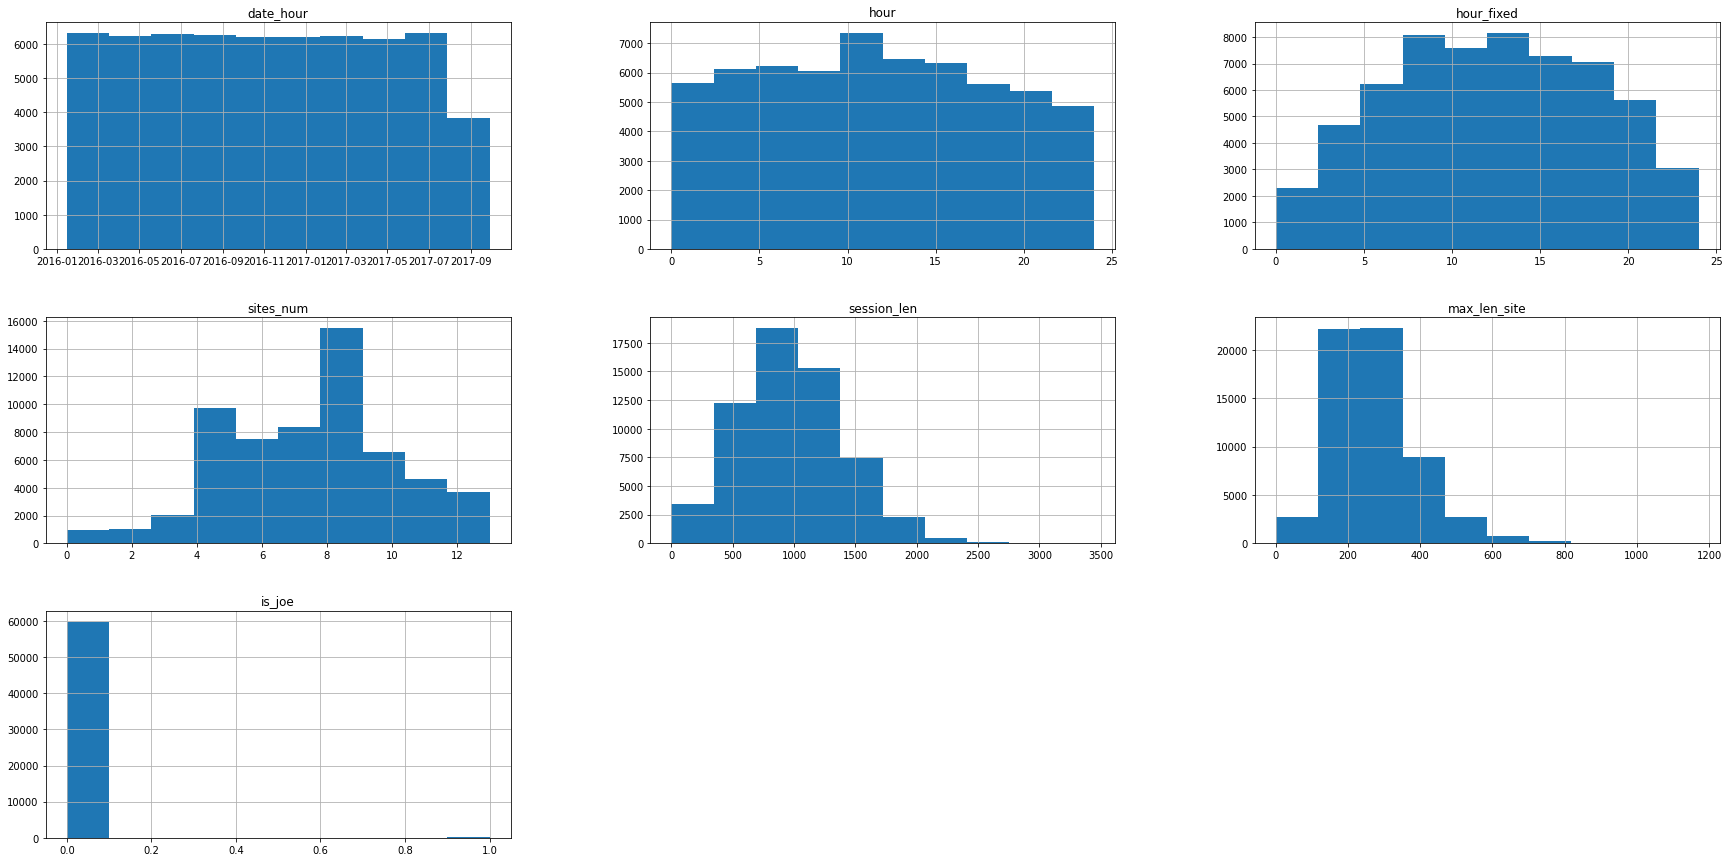

In [11]:
df.hist(figsize=(30, 15))
plt.show()


In [12]:
cont_cols = df.select_dtypes(include=[np.number]).columns
cont_cols


Index(['hour', 'hour_fixed', 'sites_num', 'session_len', 'max_len_site', 'is_joe'], dtype='object')

In [13]:
data = pd.melt(df, value_vars=cont_cols)
data.head()


,variable,value
0,hour,9.046875
1,hour,13.953125
2,hour,2.099609
3,hour,0.083313
4,hour,14.914062


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

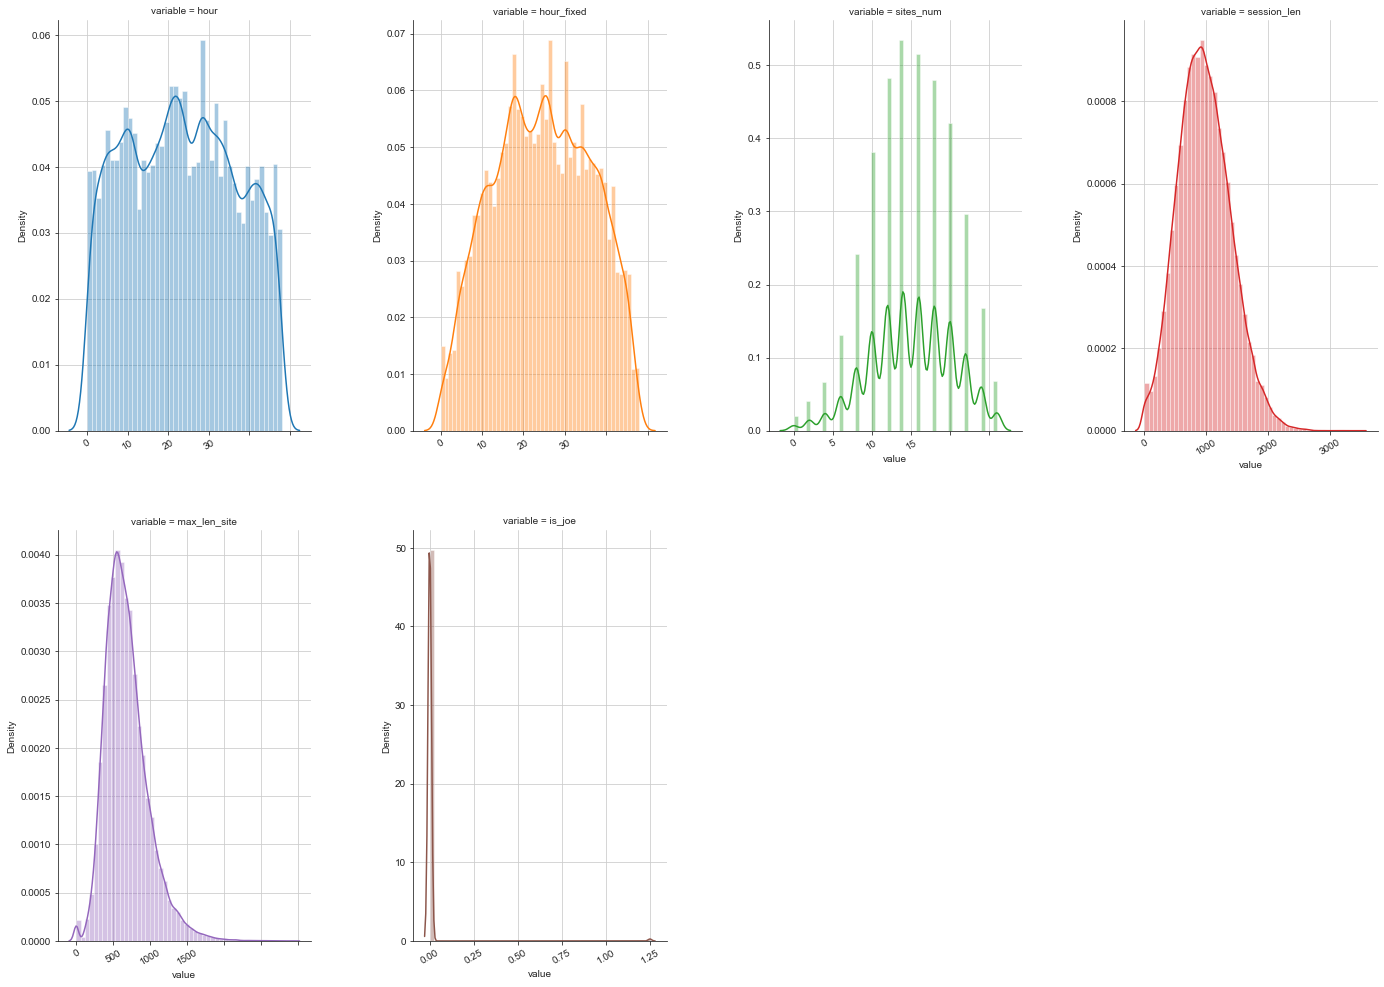

In [14]:
# Using col_wrap - we have one row. Plotting all continous numerical cols
sns.set_style("ticks", {"axes.grid": True})
plots = sns.FacetGrid(
    data, col="variable", col_wrap=4, sharex=False, sharey=False, hue="variable"
)
plots = plots.map(sns.distplot, "value")
for axes in plots.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.gcf().set_size_inches(20, 15)


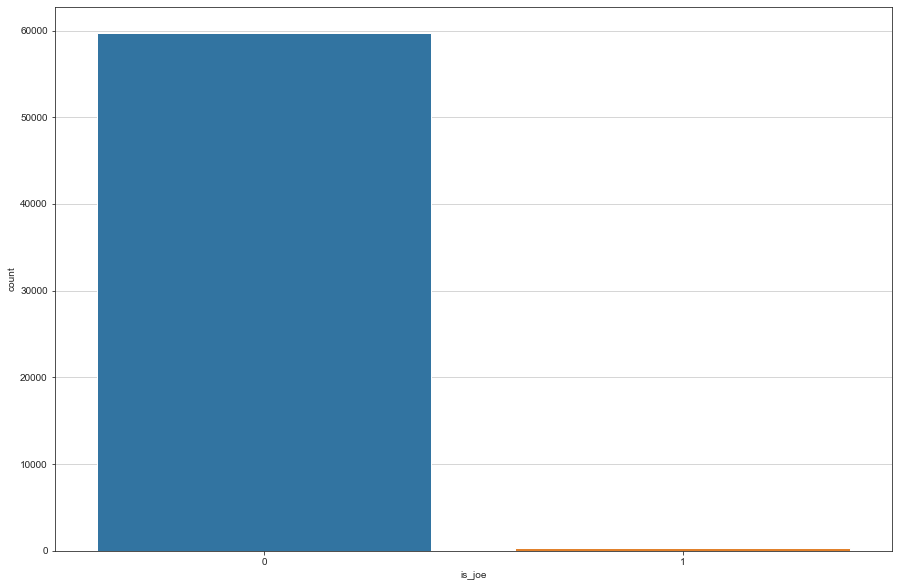

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="is_joe")
plt.show()


In [16]:
cat_cols = df.select_dtypes(object).columns
joe = df[df["is_joe"] == 1]


<AxesSubplot:xlabel='locale', ylabel='count'>

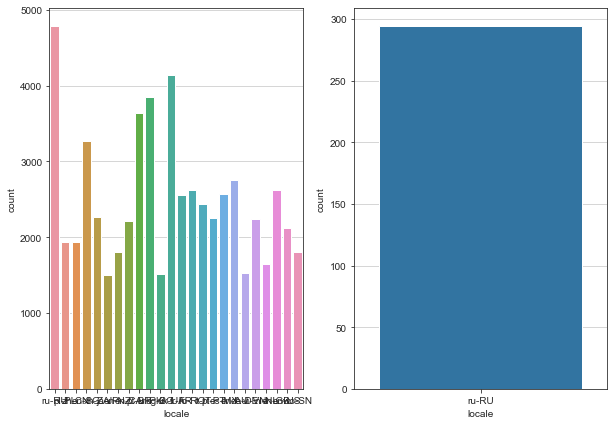

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="locale", ax=ax[0])
sns.countplot(data=joe, x="locale", ax=ax[1])


<AxesSubplot:xlabel='browser', ylabel='count'>

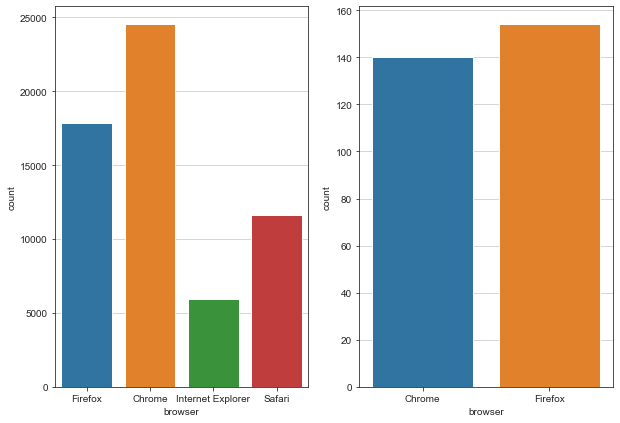

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="browser", ax=ax[0])
sns.countplot(data=joe, x="browser", ax=ax[1])


<AxesSubplot:xlabel='gender', ylabel='count'>

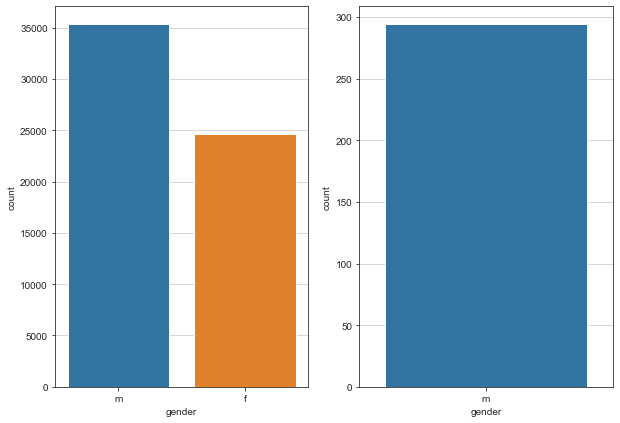

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="gender", ax=ax[0])
sns.countplot(data=joe, x="gender", ax=ax[1])


<AxesSubplot:xlabel='os', ylabel='count'>

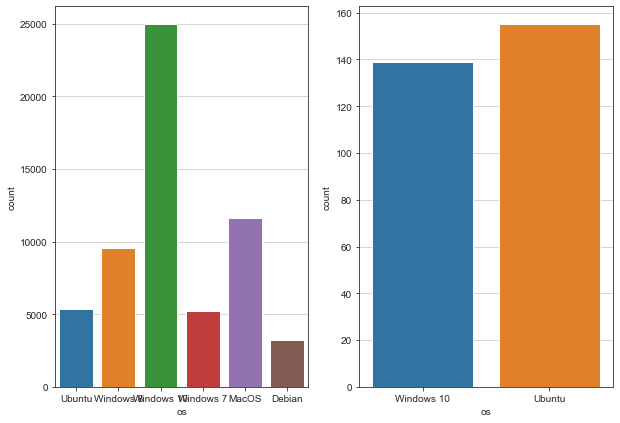

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="os", ax=ax[0])
sns.countplot(data=joe, x="os", ax=ax[1])


<AxesSubplot:xlabel='country', ylabel='count'>

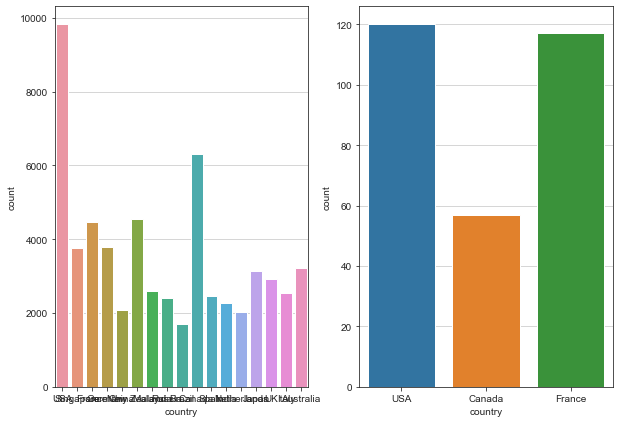

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="country", ax=ax[0])
sns.countplot(data=joe, x="country", ax=ax[1])


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

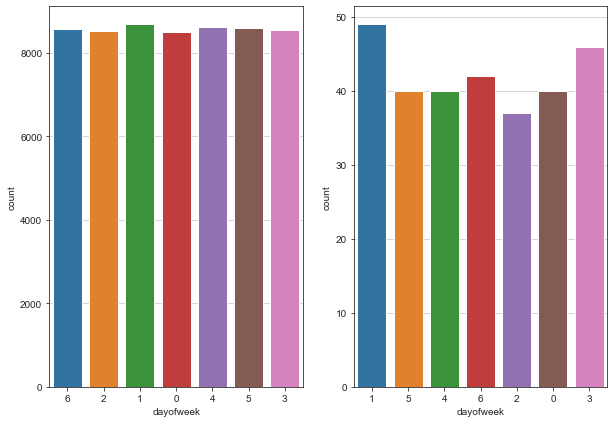

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="dayofweek", ax=ax[0])
sns.countplot(data=joe, x="dayofweek", ax=ax[1])


<AxesSubplot:xlabel='year', ylabel='count'>

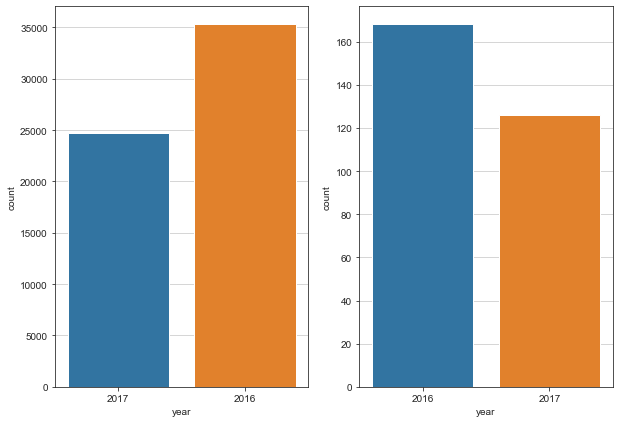

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="year", ax=ax[0])
sns.countplot(data=joe, x="year", ax=ax[1])


In [24]:
cat_cols


Index(['browser', 'os', 'locale', 'gender', 'time', 'country', 'city', 'dayofweek', 'day', 'month',
       'year', 'site_0', 'site_1', 'site_2', 'site_3', 'site_4', 'site_5', 'site_6', 'site_7',
       'site_8', 'site_9', 'site_10', 'site_11', 'site_12'],
      dtype='object')

browser has 0.0 % of null values


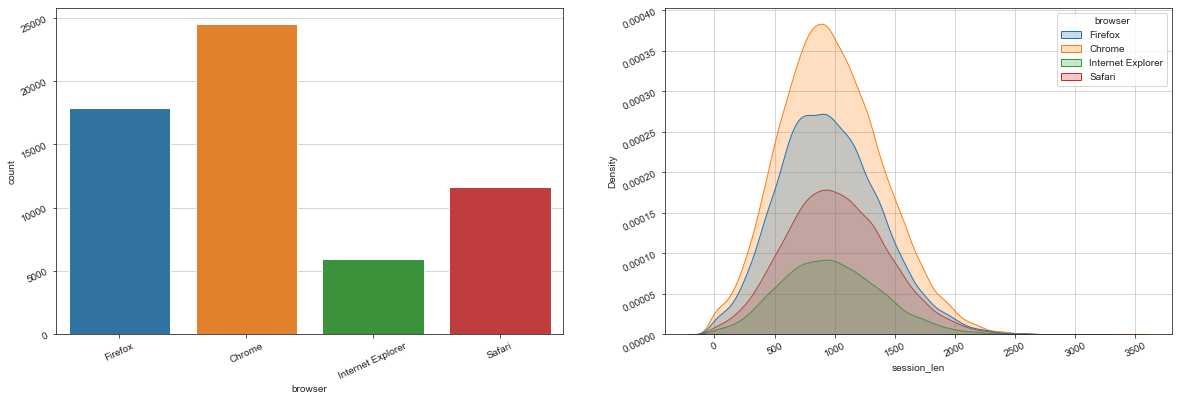

os has 0.0 % of null values


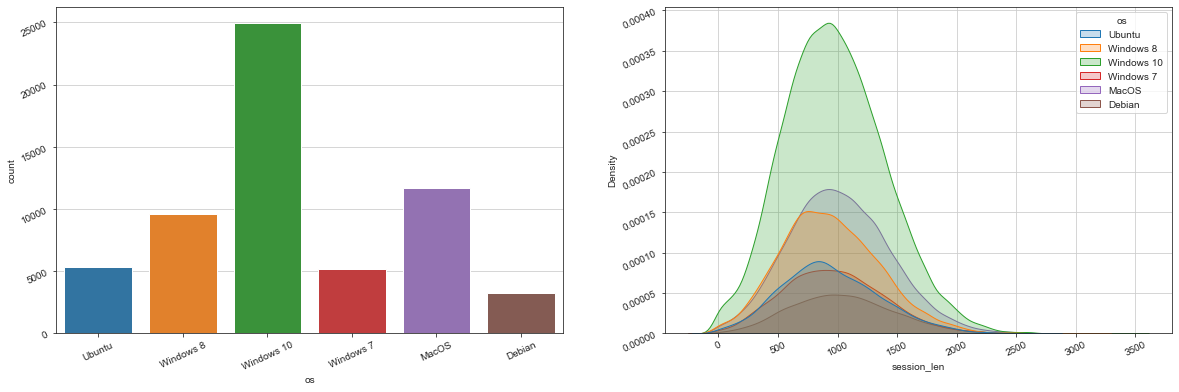

locale has 0.0 % of null values


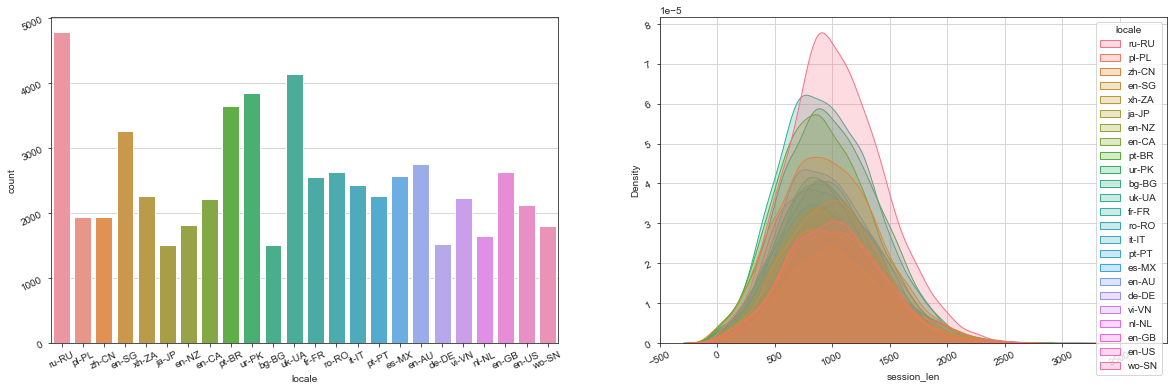

gender has 0.0 % of null values


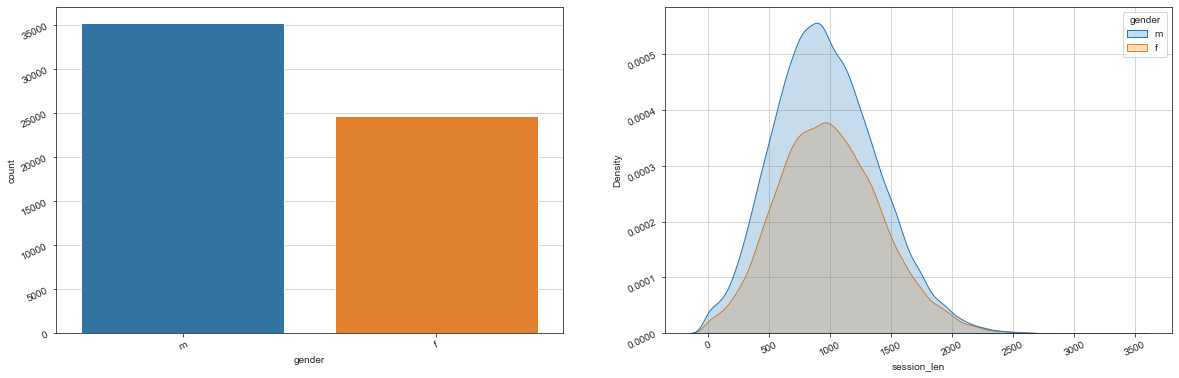

country has 0.0 % of null values


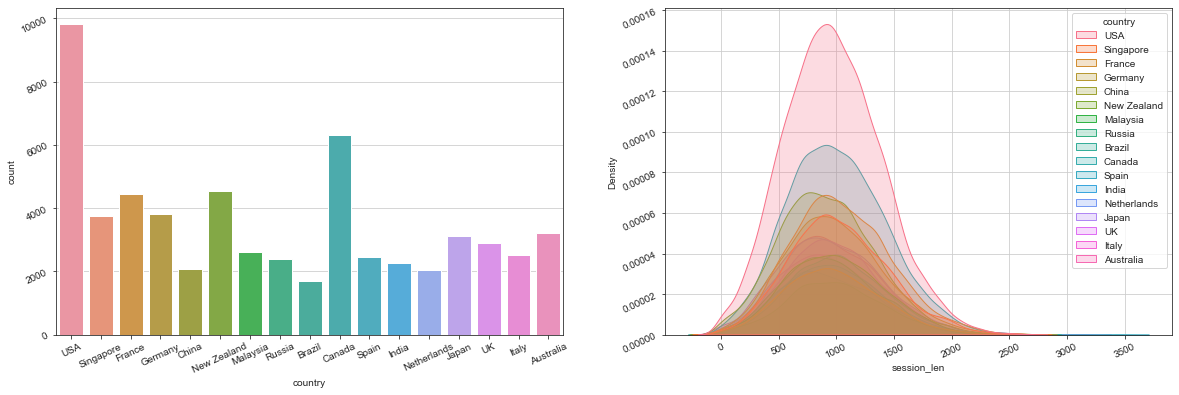

city has 0.0 % of null values


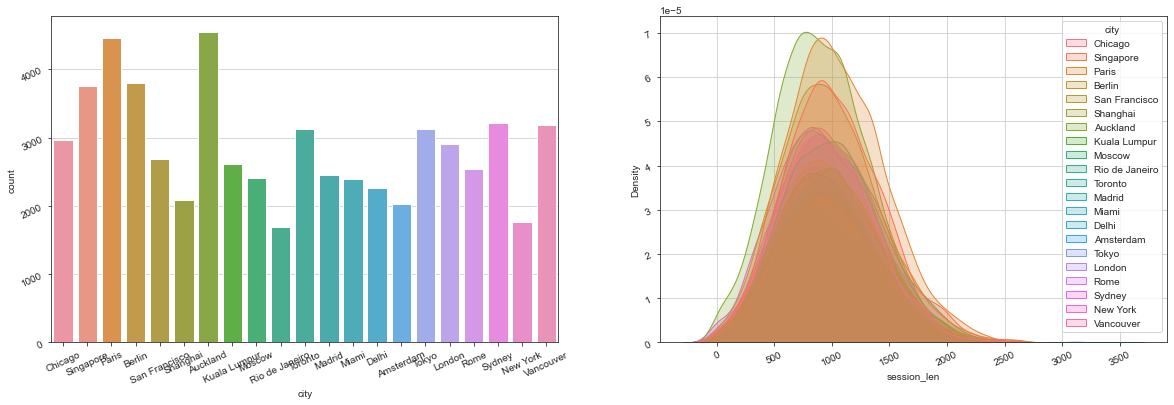

dayofweek has 0.0 % of null values


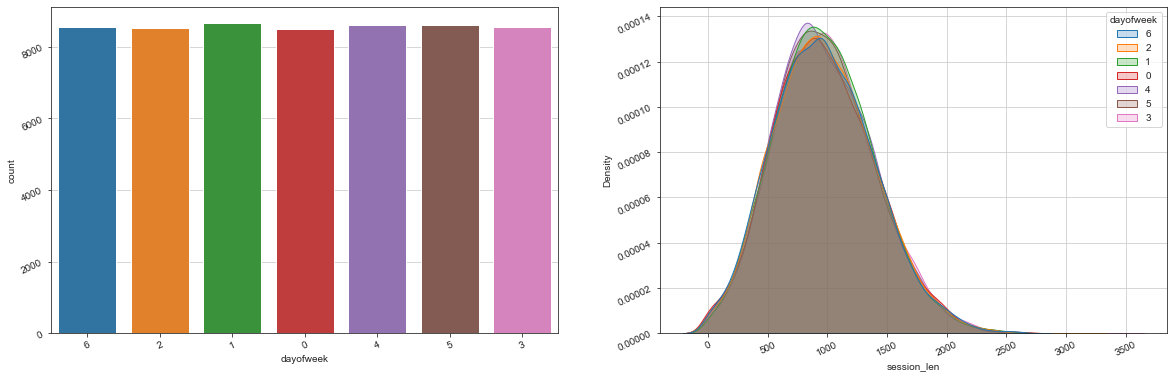

day has 0.0 % of null values


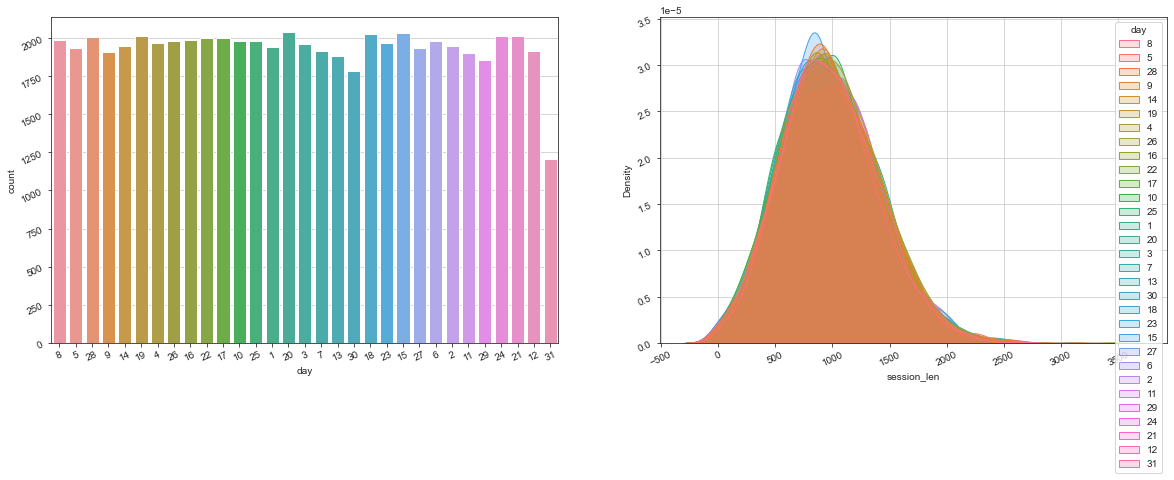

month has 0.0 % of null values


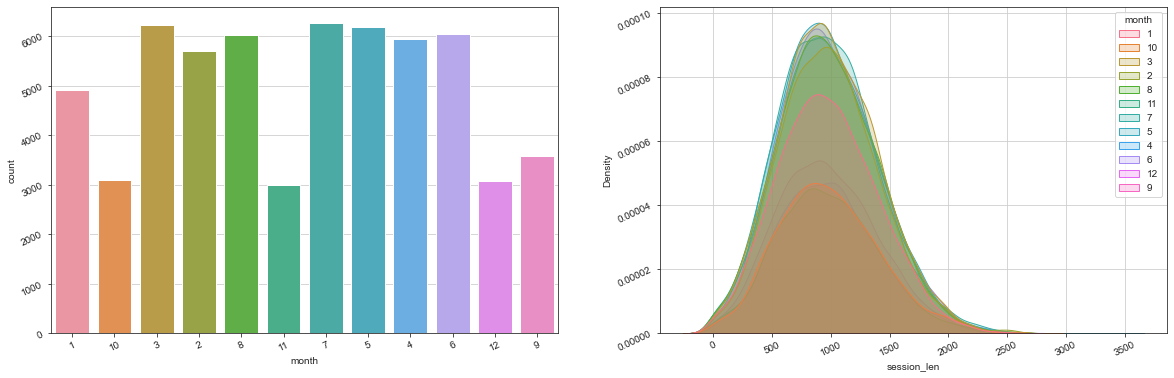

year has 0.0 % of null values


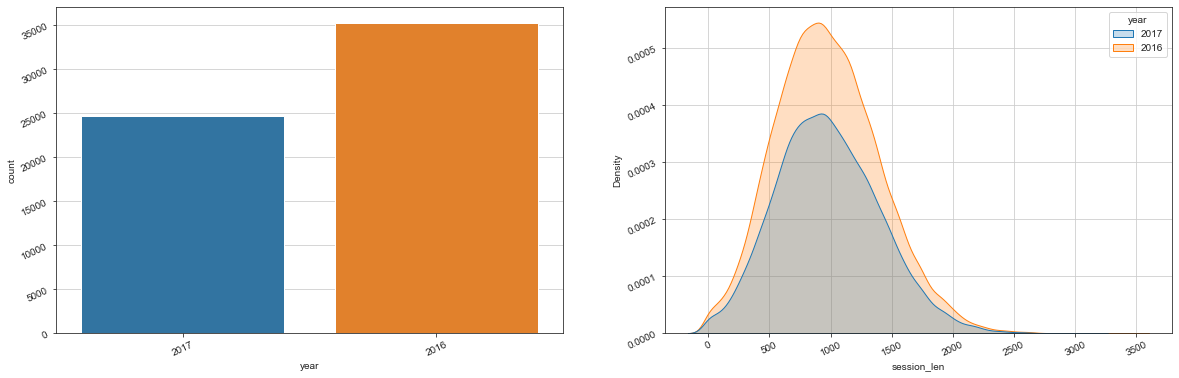

site_0 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


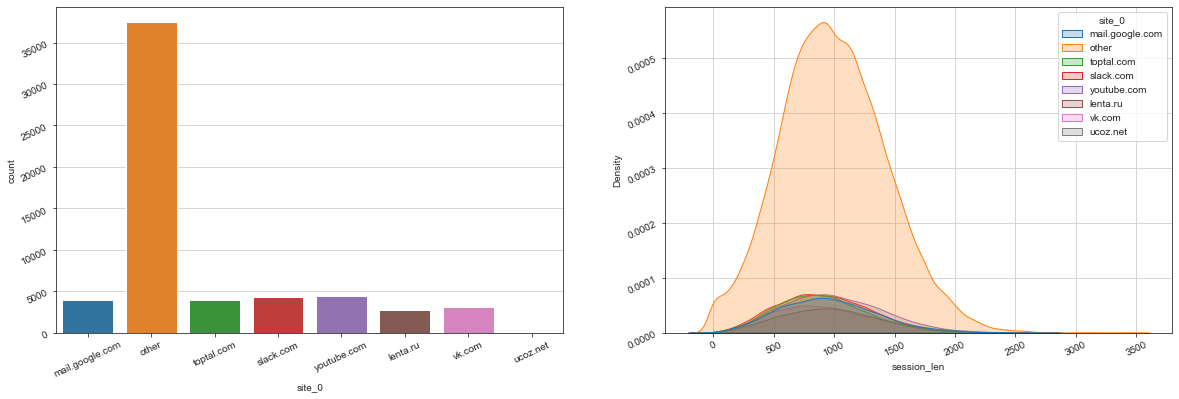

site_1 has 0.0 % of null values


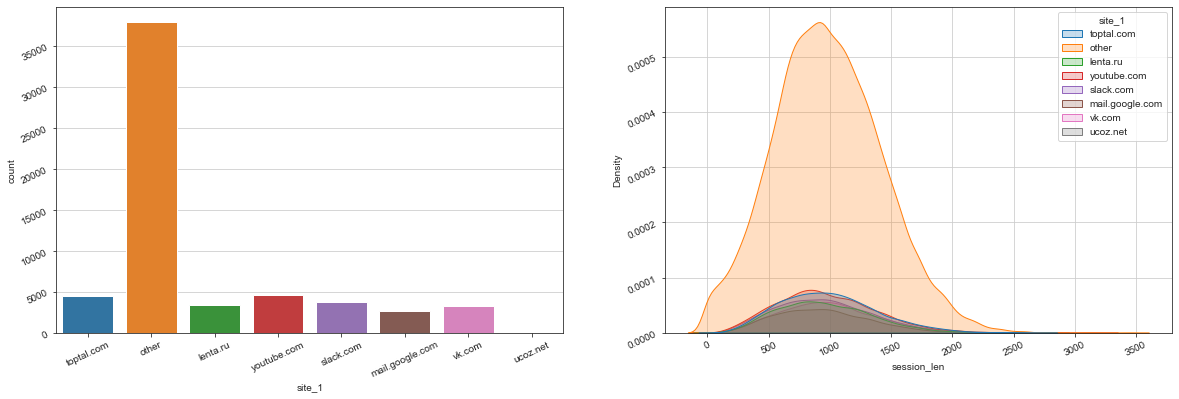

site_2 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


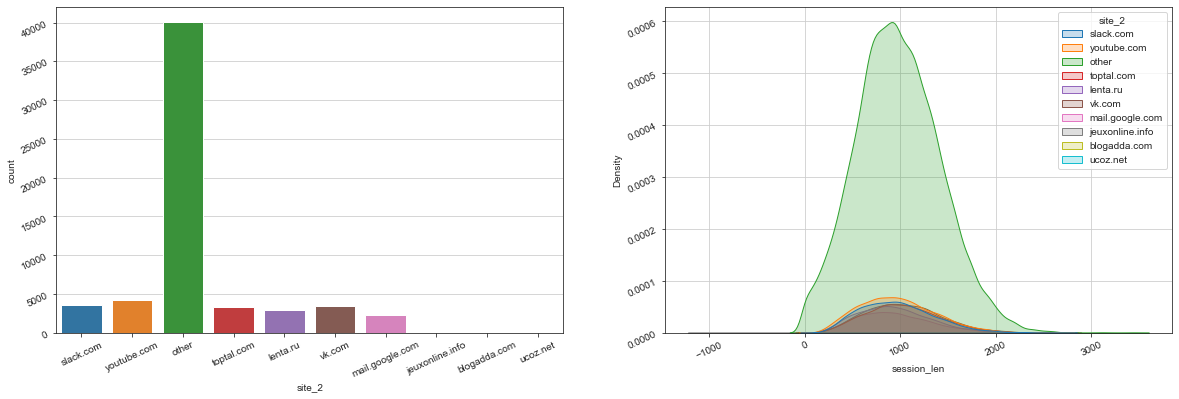

site_3 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


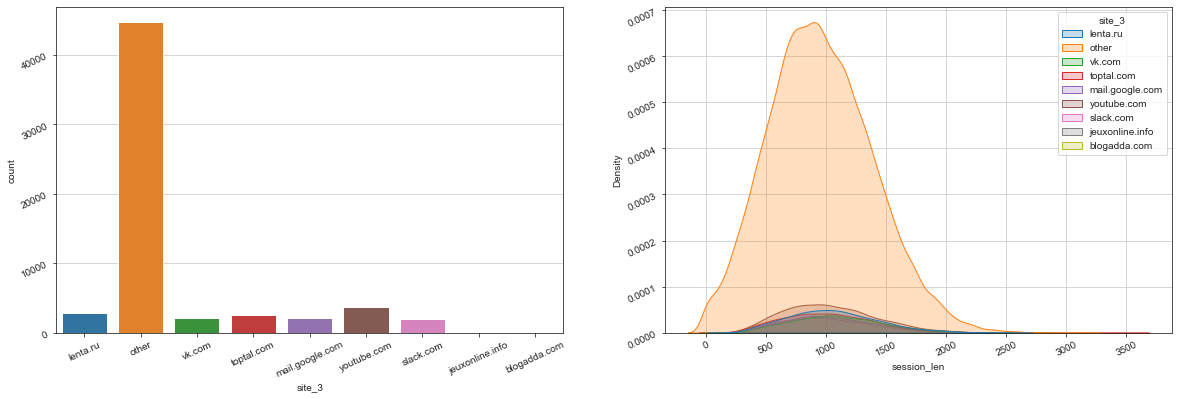

site_4 has 0.0 % of null values


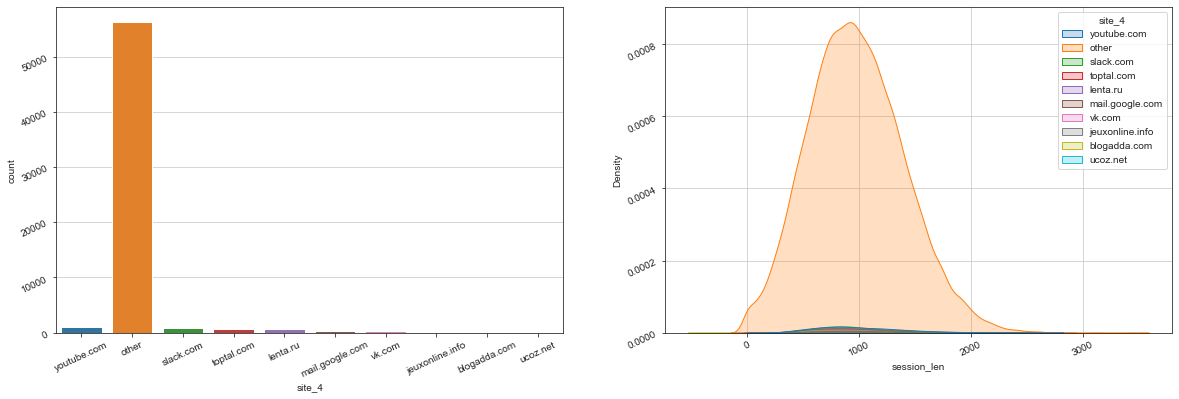

site_5 has 0.0 % of null values


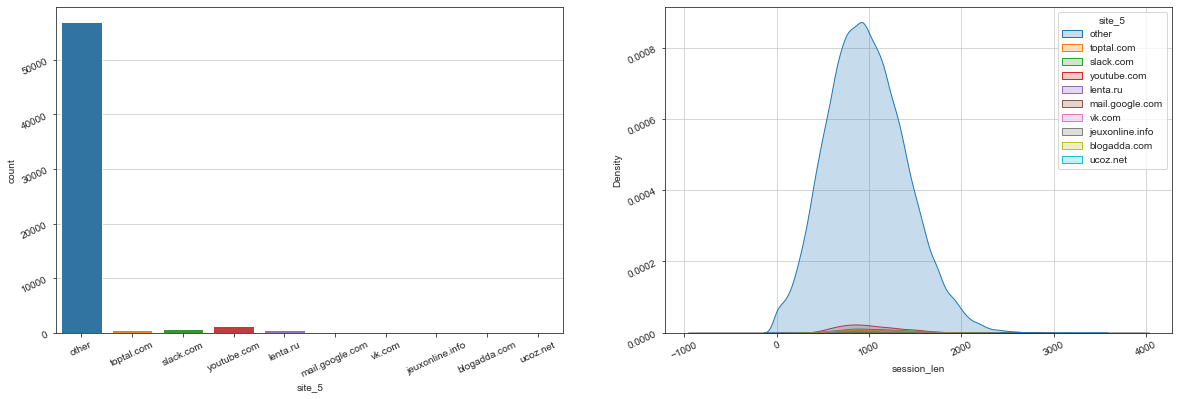

site_6 has 0.0 % of null values


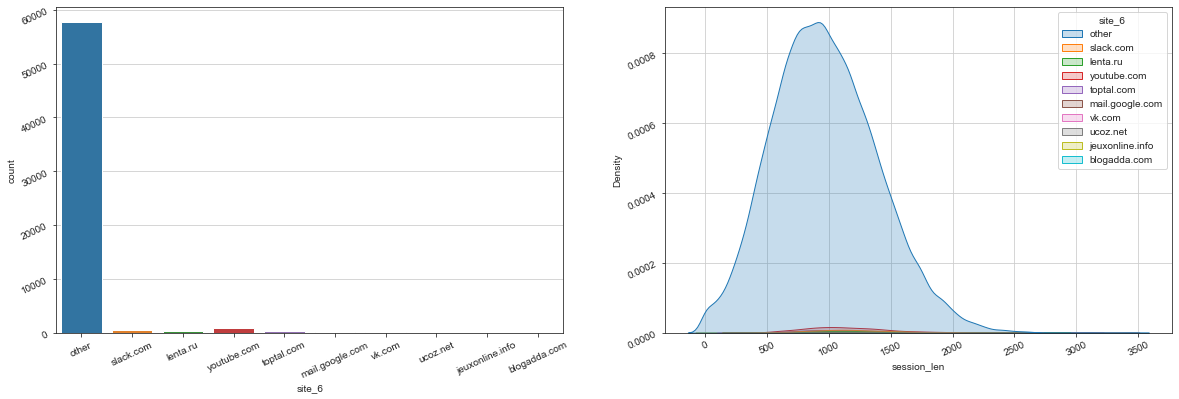

site_7 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


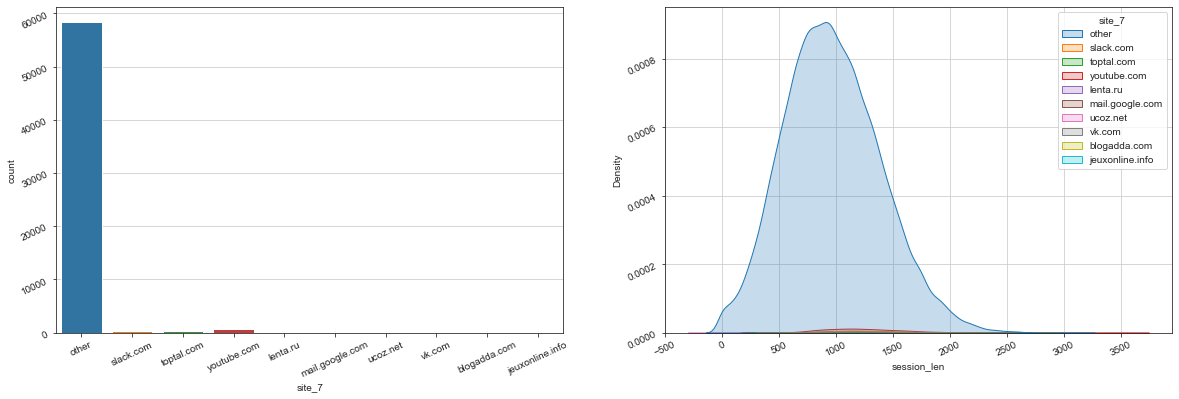

site_8 has 0.0 % of null values


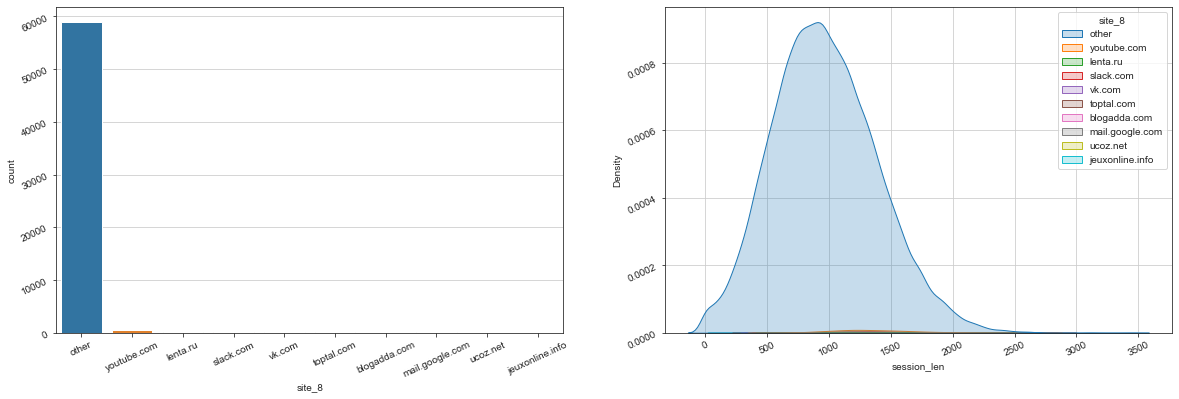

site_9 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


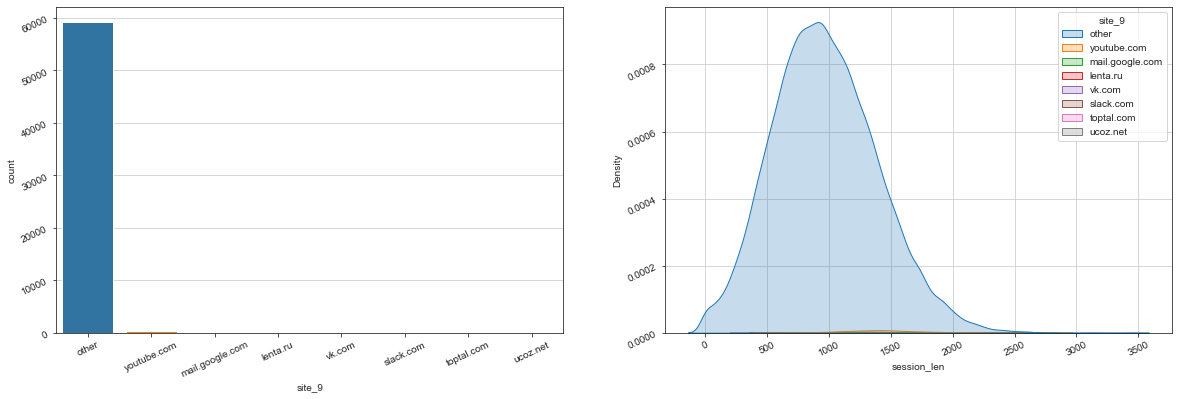

site_10 has 0.0 % of null values


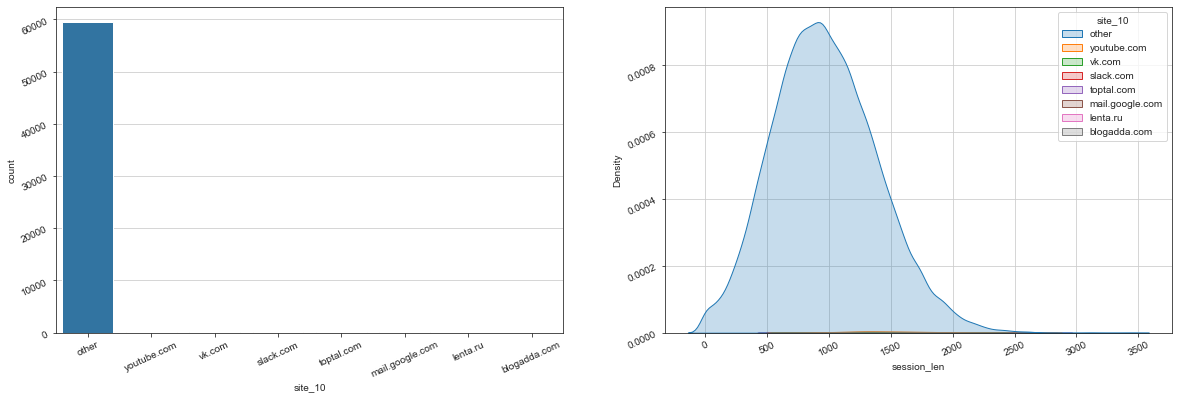

site_11 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


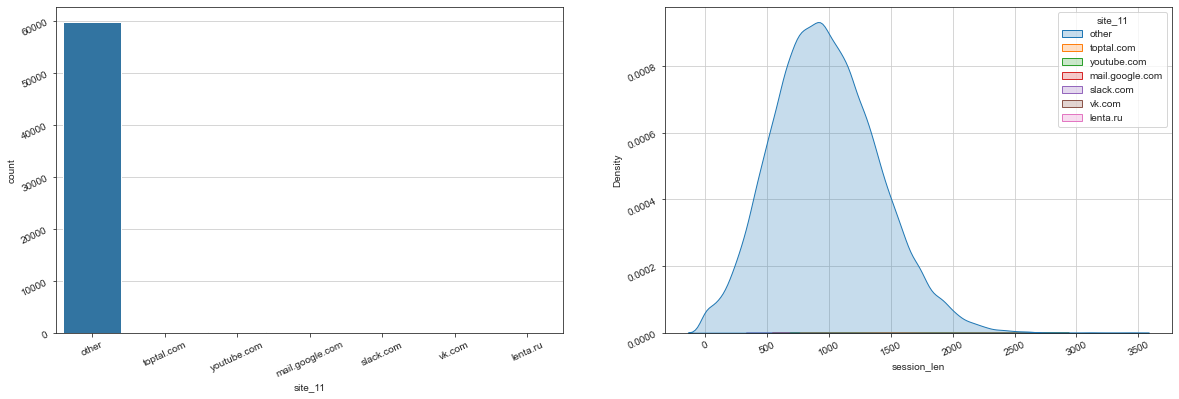

site_12 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


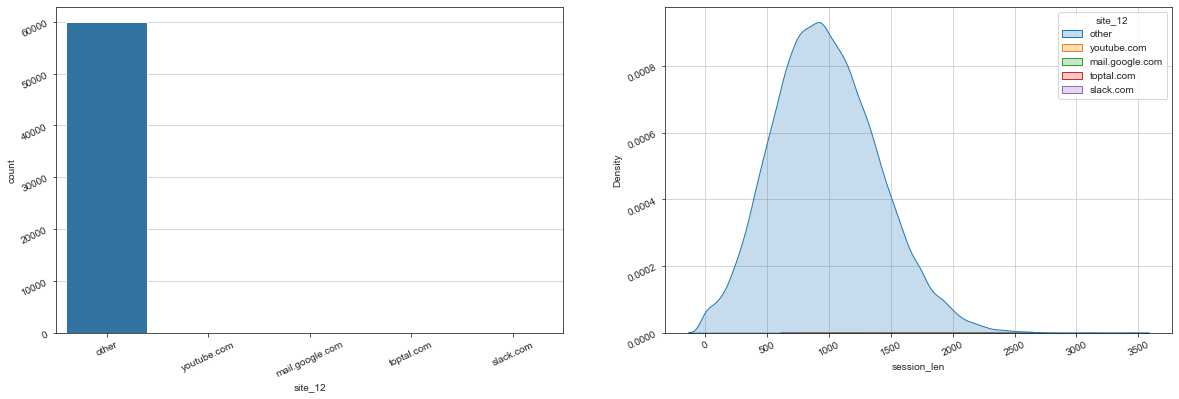

In [25]:
for col in cat_cols.drop("time"):
    categorial_feature_overview(col, 25, df)


In [26]:
df.to_csv("train_processed.csv", index=False)
